In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
def angular_flux_one_direction(sigma_t=1, x_start=0, x_end=1, mu=1, psi_initial=1, number_of_nodes=10):
    assert x_start < x_end, "x_start must be less than x_end"
    assert mu != 0, "mu cannot be zero"
    
    x = np.linspace(x_start, x_end, number_of_nodes)
    delta_x = x[1] - x[0] if mu > 0 else x[0] - x[1]
    
    tau_coeff = sigma_t * delta_x / mu
    exp_term = np.exp(-tau_coeff)
    
    diag_index = -1 if mu > 0 else 1
    
    A = sp.sparse.diags([1, -exp_term], [0, diag_index], shape=(number_of_nodes, number_of_nodes), format='csc')
    
    if mu > 0:
        b_vec = [psi_initial] + [0] * (number_of_nodes - 1)
    elif mu < 0:
        b_vec = [0] * (number_of_nodes - 1) + [psi_initial]
        
    angular_flux_sol = sp.sparse.linalg.spsolve(A, b_vec)
    
    # calculate average
    A_coeff = 0
    B_coeff = lambda xi, xe: mu / (sigma_t * (xi - xe))
    
    x_average = np.zeros(number_of_nodes-1)
    flux_average = np.zeros(number_of_nodes-1)
    for i in range(1, number_of_nodes):
        x_left = x[i-1]
        x_right = x[i]
        x_average[i-1] = (x_left + x_right) / 2
        
        flux_left = angular_flux_sol[i-1]
        flux_right = angular_flux_sol[i]
        flux_average[i-1] = A_coeff + B_coeff(x_left, x_right) * (flux_right - flux_left)
        
    return x, angular_flux_sol, x_average, flux_average


C:\Users\bpeco\AppData\Local\Temp\ipykernel_27868\807373875.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  B_coeff = lambda xi, xe: mu / (sigma_t * (xi - xe))
C:\Users\bpeco\AppData\Local\Temp\ipykernel_27868\807373875.py:35: RuntimeWarning: invalid value encountered in scalar multiply
  flux_average[i-1] = A_coeff + B_coeff(x_left, x_right) * (flux_right - flux_left)


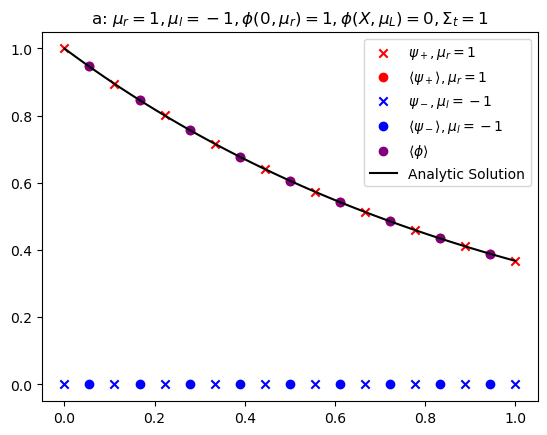

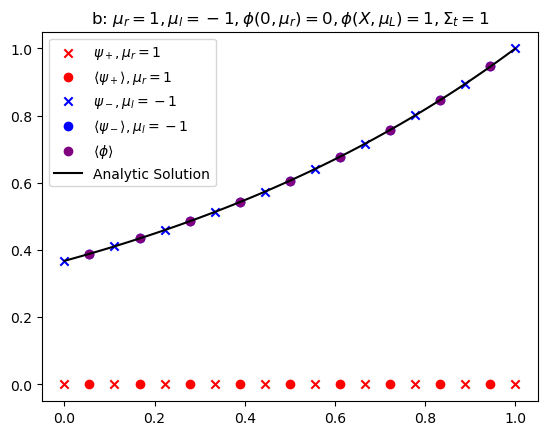

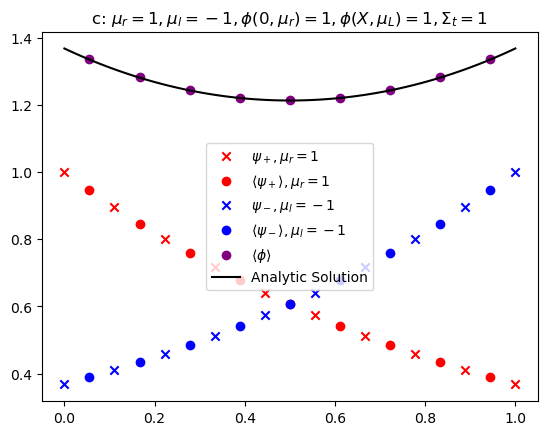

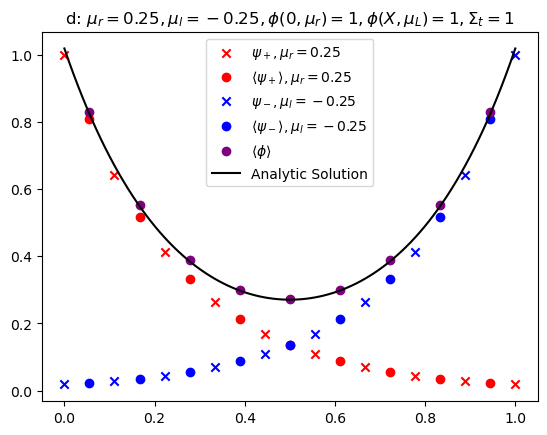

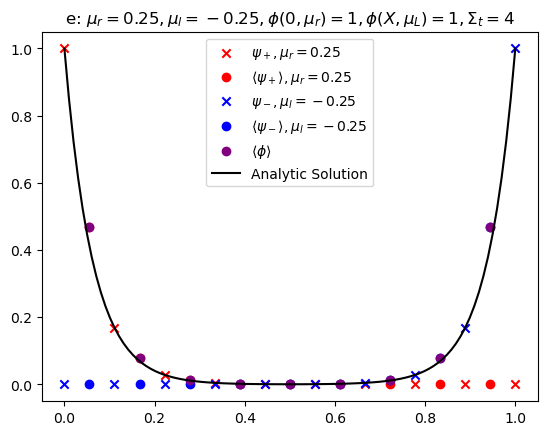

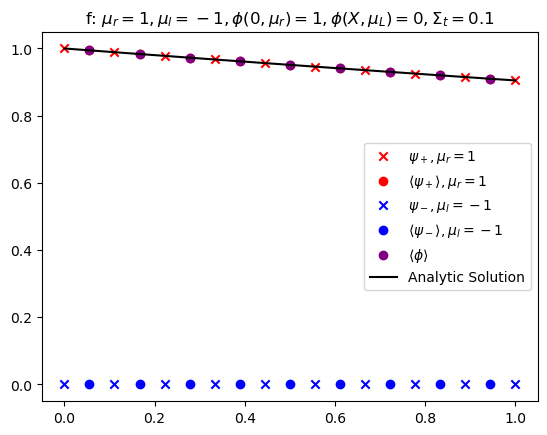

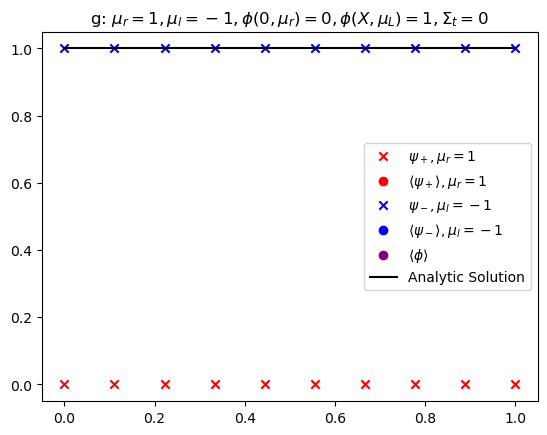

In [3]:
# sigma_t = 1
# mu_r = 1
# mu_l = -1
# phi_r = 1
# phi_l = 1

def angular_flux(mu_r, mu_l, phi_r, phi_l, sigma_t=1, title_start=""):
# r and l mean going the flux is going in the right or left direction
# so r corresponds to the left boundary

    x_pos, flux_pos, x_avg, flux_pos_avg = angular_flux_one_direction(
        sigma_t=sigma_t, x_start=0, x_end=1, mu=mu_r, psi_initial=phi_r
    )

    x_neg, flux_neg, x_avg, flux_neg_avg = angular_flux_one_direction(
        sigma_t=sigma_t, x_start=0, x_end=1, mu=mu_l, psi_initial=phi_l
    )

    pos_analytic = lambda x: phi_r * np.exp(-sigma_t * (x - 0) / mu_r)
    neg_analytic = lambda x: phi_l * np.exp(-sigma_t * (x - 1) / mu_l)

    flux_analytic = lambda x: pos_analytic(x) + neg_analytic(x)

    fig, ax = plt.subplots()
    ax.scatter(x_pos, flux_pos, label=rf"$\psi_+, \mu_r = {mu_r}$", color="red", marker="x")
    ax.scatter(x_avg, flux_pos_avg, label=rf"$\langle \psi_+ \rangle, \mu_r = {mu_r}$", color="red")
    ax.scatter(x_neg, flux_neg, label=rf"$\psi_-, \mu_l = {mu_l}$", color="blue", marker="x")
    ax.scatter(x_avg, flux_neg_avg, label=rf"$\langle \psi_- \rangle, \mu_l = {mu_l}$", color="blue")
    
    ax.scatter(x_avg, flux_pos_avg + flux_neg_avg, label=r"$\langle \phi \rangle$", color="purple")
    
    analytic_x = np.linspace(0, 1, 100)
    ax.plot(analytic_x, flux_analytic(analytic_x), label="Analytic Solution", color="black")
    ax.legend()

    ax.set_title(
        rf"{title_start}: $\mu_r = {mu_r}, \mu_l = {mu_l}, \phi(0,\mu_r) = {phi_r}, \phi(X,\mu_L) = {phi_l}, \Sigma_t = {sigma_t}$"
    )
    
    return fig, ax

a = [1,-1,1,0,1,"a"]
b = [1,-1,0,1,1,"b"]
c = [1,-1,1,1,1,"c"]
d = [0.25,-0.25,1,1,1,"d"]
e = [0.25,-0.25,1,1,4,"e"]
f = [1,-1,1,0,0.1,"f"]
g = [1,-1,0,1,0,"g"]

for i in [a,b,c,d,e,f,g]:
    angular_flux(*i)